In [5]:
!pip install pillow

In [12]:
from PIL import Image, ImageDraw

Решаем label-placement c двумя возможными расположениями. На вход принимаем список меток. Метка - это четверка чисел, первые две координаты - положение центра прямоугольника, следующие две - его ширина и высота

In [13]:
from copy import copy

def make_graphs(formula, N):
    g = [[] for _ in range(2*N)]
    gt = [[] for _ in range(2*N)]
    for edge in formula:
        v1, v2 = 2*(abs(edge[0]) - 1), 2*(abs(edge[1]) - 1)
        add1 = int(edge[0] > 0)
        add2 = int(edge[1] < 0)
        g[v1+add1].append(v2+add2)
        g[v2+((add2 + 1)%2)].append(v1+((add1 + 1)%2))
        gt[v2+add2].append(v1+add1)
        gt[v1+((add1 + 1)%2)].append(v2+((add2 + 1)%2))
    return g, gt

class Solver:
    def __init__(self, g, gt, n):
        self.n = n
        self.g = g
        self.gt = gt
        self.used = [False for _ in range(n)]
        self.order, self.comp = [], [-1 for _ in range(n)]
        self.result = [False for _ in range(n//2)]

    def dfs1(self, v):
        self.used[v] = True
        for u in self.g[v]:
            if not self.used[u]:
                self.dfs1(u)
        self.order.append(v)

    def dfs2(self, v, cl):
        self.comp[v] = cl
        for u in self.gt[v]:
            if self.comp[u] == -1:
                self.dfs2(u, cl)

    def solve(self):
        for i in range(self.n):
            if not self.used[i]:
                self.dfs1(i)

        for i in range(self.n):
            v = self.order[self.n - i - 1]
            if (self.comp[v] == -1):
                self.dfs2(v, i)
                i += 1

        
        for i in range(0, self.n, 2): 
            if self.comp[i] == self.comp[i + 1]:
                return False
            self.result[i // 2] = (self.comp[i] > self.comp[i + 1])
        return True


def is_intersect(l1, l2):
    size = 500
    def lines_intersect(line1, line2):
        return not((line2[0] > line1[1]) or (line1[0] > line2[1]))
    
    x1_l = [l1[1] - l1[3]/2, l1[1] + l1[3]/2]
    x2_l = [l2[1] - l2[3]/2, l2[1] + l2[3]/2]
    
    y1_l = [l1[0] - l1[2]/2, l1[0] + l1[2]/2]
    y2_l = [l2[0] - l2[2]/2, l2[0] + l2[2]/2]
    
    if x1_l[0] < 0 or x1_l[1] > size or x2_l[0] < 0 or x2_l[1] > size:
        return True
    
    if y1_l[0] < 0 or y1_l[1] > size or y2_l[0] < 0 or y2_l[1] > size:
        return True
    
    return lines_intersect(x1_l, x2_l) and lines_intersect(y1_l, y2_l)

def make_formula(labels):
    formulas = []
    for i in range(len(labels)):
        for j in range(i+1, len(labels)):
            for k in range(4):
                x1, x2 = k % 2, k // 2
                l1, l2 = copy(labels[i]), copy(labels[j])
                if x1 == 0:
                    l1[0] -= l1[2]/2
                else:
                    l1[0] += l1[2]/2
                    
                if x2 == 0:
                    l2[0] -= l2[2]/2
                else:
                    l2[0] += l2[2]/2
                
                if is_intersect(l1, l2):
                    mark1, mark2 = i+1, j+1
                    if x1 == 1:
                        mark1 = -mark1
                    if x2 == 1:
                        mark2 = -mark2
                        
                    formulas.append([mark1, mark2])
    return formulas

def solve_formulas(formulas, n):
    g, gt = make_graphs(formulas, n)
    solver = Solver(g, gt, 2*n)
    if solver.solve():
        return solver.result
    else:
        return None


def draw(labels, model):
    image = Image.new("RGBA", (500,500), (0,0,0,0))
    draw = ImageDraw.Draw(image)
    draw.rectangle((0, 0, 499, 499), outline="red")
    
    for i in range(len(labels)):
        l1 = copy(labels[i])
        if not model[i]:
            l1[0] -= l1[2]/2
        else:
            l1[0] += l1[2]/2

        draw.rectangle((l1[0] - l1[2]/2, l1[1] - l1[3]/2, l1[0] + l1[2]/2, l1[1] + l1[3]/2), outline="red")
        draw.ellipse((labels[i][0]-1, labels[i][1]-1, labels[i][0]+1, labels[i][1]+1), fill = 'blue', outline ='blue')
    return image

In [14]:
def plot_labels(labels):
    formulas = make_formula(labels)
    model = solve_formulas(formulas, len(labels))
    if model is None:
        return None
    return draw(labels, model)

Пример с возможным расположением. Синие точки - центры начального положения лэйблов

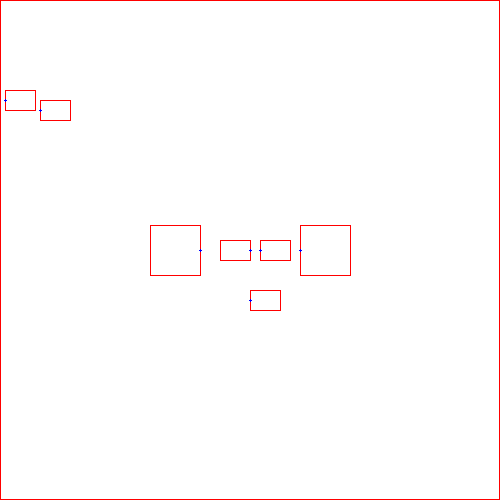

In [15]:
labels = [[250, 250, 30, 20], [250, 300, 30, 20], [260, 250, 30, 20], [5, 100, 30, 20],
         [40, 110, 30, 20], [300, 250, 50, 50], [200, 250, 50, 50]]

img = plot_labels(labels)
img

In [16]:
img.save('labels.png')

Пример невозможного расположения (два лэйбла и они совпадают)

In [17]:
labels = [[250, 250, 30, 20], [250, 250, 30, 20]]

img = plot_labels(labels)
print(img)

None
